In [2]:
import pandas as pd
df = pd.read_csv('../dataset/imdb.zip')
df.head()

,review,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [3]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
x = cv.fit_transform(df.review)

In [4]:
x.shape

(1000, 3047)

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, df.sentiment.values, test_size=0.2, random_state=1235)

In [6]:
import tensorflow as tf

In [7]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [8]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), 
    loss='binary_crossentropy',
    metrics=['accuracy'])

In [9]:
model.fit(x_train.A, y_train, epochs=200, validation_data=(x_test.A, y_test))

Epoch 1/200
25/25 [==============================] - 1s 40ms/step - loss: 0.6764 - accuracy: 0.6185 - val_loss: 0.6412 - val_accuracy: 0.6750
Epoch 2/200
25/25 [==============================] - 0s 2ms/step - loss: 0.5262 - accuracy: 0.8997 - val_loss: 0.5955 - val_accuracy: 0.7500
Epoch 3/200
25/25 [==============================] - 0s 2ms/step - loss: 0.4253 - accuracy: 0.9405 - val_loss: 0.5648 - val_accuracy: 0.7500
Epoch 4/200
25/25 [==============================] - 0s 2ms/step - loss: 0.3648 - accuracy: 0.9621 - val_loss: 0.5492 - val_accuracy: 0.7600
Epoch 5/200
25/25 [==============================] - 0s 3ms/step - loss: 0.3174 - accuracy: 0.9740 - val_loss: 0.5327 - val_accuracy: 0.7600
Epoch 6/200
25/25 [==============================] - 0s 2ms/step - loss: 0.2748 - accuracy: 0.9696 - val_loss: 0.5241 - val_accuracy: 0.7550
Epoch 7/200
25/25 [==============================] - 0s 2ms/step - loss: 0.2409 - accuracy: 0.9852 - val_loss: 0.5116 - val_accuracy: 0.7750
Epoch 8/200


Epoch 59/200
25/25 [==============================] - 0s 2ms/step - loss: 0.0268 - accuracy: 0.9981 - val_loss: 0.5455 - val_accuracy: 0.7750
Epoch 60/200
25/25 [==============================] - 0s 2ms/step - loss: 0.0303 - accuracy: 0.9981 - val_loss: 0.5453 - val_accuracy: 0.7750
Epoch 61/200
25/25 [==============================] - 0s 2ms/step - loss: 0.0263 - accuracy: 0.9996 - val_loss: 0.5466 - val_accuracy: 0.7800
Epoch 62/200
25/25 [==============================] - 0s 3ms/step - loss: 0.0310 - accuracy: 0.9954 - val_loss: 0.5496 - val_accuracy: 0.7700
Epoch 63/200
25/25 [==============================] - 0s 3ms/step - loss: 0.0264 - accuracy: 0.9972 - val_loss: 0.5506 - val_accuracy: 0.7700
Epoch 64/200
25/25 [==============================] - 0s 2ms/step - loss: 0.0265 - accuracy: 0.9997 - val_loss: 0.5521 - val_accuracy: 0.7750
Epoch 65/200
25/25 [==============================] - 0s 2ms/step - loss: 0.0242 - accuracy: 0.9979 - val_loss: 0.5542 - val_accuracy: 0.7750
Epoch 

Epoch 116/200
25/25 [==============================] - 0s 2ms/step - loss: 0.0105 - accuracy: 1.0000 - val_loss: 0.6395 - val_accuracy: 0.7650
Epoch 117/200
25/25 [==============================] - 0s 2ms/step - loss: 0.0092 - accuracy: 1.0000 - val_loss: 0.6424 - val_accuracy: 0.7600
Epoch 118/200
25/25 [==============================] - 0s 2ms/step - loss: 0.0112 - accuracy: 1.0000 - val_loss: 0.6448 - val_accuracy: 0.7600
Epoch 119/200
25/25 [==============================] - 0s 2ms/step - loss: 0.0089 - accuracy: 1.0000 - val_loss: 0.6455 - val_accuracy: 0.7650
Epoch 120/200
25/25 [==============================] - 0s 2ms/step - loss: 0.0081 - accuracy: 1.0000 - val_loss: 0.6467 - val_accuracy: 0.7600
Epoch 121/200
25/25 [==============================] - 0s 2ms/step - loss: 0.0109 - accuracy: 1.0000 - val_loss: 0.6485 - val_accuracy: 0.7600
Epoch 122/200
25/25 [==============================] - 0s 2ms/step - loss: 0.0099 - accuracy: 1.0000 - val_loss: 0.6500 - val_accuracy: 0.7550

In [10]:
# 피처가 많아지면 과적합
# 불필요한 변수 늘어나면 과적합 유도
# 많은 epoch 과적합 유도

In [11]:
prob = model.predict(x_test.A)

In [12]:
import numpy as np
y_pred = np.where(prob > 0.7, 1, 0)

In [13]:
from sklearn.metrics import confusion_matrix

In [14]:
confusion_matrix(y_test, y_pred)

array([[91, 20],
       [29, 60]], dtype=int64)

In [15]:
from sklearn.metrics import *

In [16]:
accuracy_score(y_test, y_pred)

0.755

In [17]:
precision_score(y_test, y_pred, pos_label=1) # threshold 낮추니까 낮아짐

0.75

In [18]:
recall_score(y_test, y_pred, pos_label=1) # threshold 높이니까 높아짐

0.6741573033707865

In [19]:
f1_score(y_test, y_pred)

0.7100591715976332

In [20]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [21]:
fpr, tpr, threshold = roc_curve(y_test, prob)

- fpr = False Positive Ratio = FP(위양성) / 음성 = 1-특이도(음성 중에 얼마나 틀렸는가?)
- tpr = True Positive Ratio = TP(진양성) / 양성 = 재현도(recall) = 민감도(sensitivity)(실제 양성 중에 얼마나 맞았는가?)


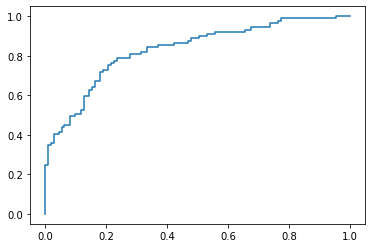

In [22]:
plt.plot(fpr, tpr)

In [23]:
roc_auc_score(y_test, prob)

0.8304484259540439

In [26]:
ww1 = pd.DataFrame({
    'word': cv.get_feature_names(),
    'weight': model.trainable_weights[0].numpy().flat
})

In [27]:
ww1.sort_values('weight', ascending=False).head()

,word,weight
1181,great,6.086578
1715,miss,5.015995
1405,interesting,4.836920
1566,liked,4.832507
1333,identify,4.772493


In [41]:
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Dense(1, 
                                 activation='sigmoid', 
                                 kernel_regularizer=tf.keras.regularizers.l1(0.001)))

In [42]:
model2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), 
    loss='binary_crossentropy', 
    metrics=['accuracy'])

In [43]:
model2.fit(x_train.A, y_train, epochs=200, validation_data=(x_test.A, y_test))

Epoch 1/200
25/25 [==============================] - 0s 8ms/step - loss: 0.7198 - accuracy: 0.5671 - val_loss: 0.7038 - val_accuracy: 0.6800
Epoch 2/200
25/25 [==============================] - 0s 3ms/step - loss: 0.6418 - accuracy: 0.8696 - val_loss: 0.6929 - val_accuracy: 0.6750
Epoch 3/200
25/25 [==============================] - 0s 3ms/step - loss: 0.6026 - accuracy: 0.8670 - val_loss: 0.6788 - val_accuracy: 0.7150
Epoch 4/200
25/25 [==============================] - 0s 3ms/step - loss: 0.5732 - accuracy: 0.8846 - val_loss: 0.6768 - val_accuracy: 0.7050
Epoch 5/200
25/25 [==============================] - 0s 3ms/step - loss: 0.5590 - accuracy: 0.8871 - val_loss: 0.6756 - val_accuracy: 0.6800
Epoch 6/200
25/25 [==============================] - 0s 3ms/step - loss: 0.5385 - accuracy: 0.8954 - val_loss: 0.6754 - val_accuracy: 0.6900
Epoch 7/200
25/25 [==============================] - 0s 3ms/step - loss: 0.5286 - accuracy: 0.9004 - val_loss: 0.6778 - val_accuracy: 0.6800
Epoch 8/200
2

Epoch 59/200
25/25 [==============================] - 0s 3ms/step - loss: 0.4432 - accuracy: 0.9357 - val_loss: 0.7400 - val_accuracy: 0.7000
Epoch 60/200
25/25 [==============================] - 0s 3ms/step - loss: 0.4491 - accuracy: 0.9332 - val_loss: 0.7429 - val_accuracy: 0.7050
Epoch 61/200
25/25 [==============================] - 0s 3ms/step - loss: 0.4576 - accuracy: 0.9374 - val_loss: 0.7400 - val_accuracy: 0.7100
Epoch 62/200
25/25 [==============================] - 0s 3ms/step - loss: 0.4524 - accuracy: 0.9382 - val_loss: 0.7408 - val_accuracy: 0.7050
Epoch 63/200
25/25 [==============================] - 0s 3ms/step - loss: 0.4499 - accuracy: 0.9379 - val_loss: 0.7415 - val_accuracy: 0.7100
Epoch 64/200
25/25 [==============================] - 0s 3ms/step - loss: 0.4552 - accuracy: 0.9214 - val_loss: 0.7418 - val_accuracy: 0.7100
Epoch 65/200
25/25 [==============================] - 0s 3ms/step - loss: 0.4542 - accuracy: 0.9276 - val_loss: 0.7396 - val_accuracy: 0.7100
Epoch 

25/25 [==============================] - 0s 3ms/step - loss: 0.4473 - accuracy: 0.9419 - val_loss: 0.7600 - val_accuracy: 0.7050
Epoch 174/200
25/25 [==============================] - 0s 3ms/step - loss: 0.4584 - accuracy: 0.9256 - val_loss: 0.7621 - val_accuracy: 0.7200
Epoch 175/200
25/25 [==============================] - 0s 4ms/step - loss: 0.4567 - accuracy: 0.9286 - val_loss: 0.7632 - val_accuracy: 0.7200
Epoch 176/200
25/25 [==============================] - 0s 3ms/step - loss: 0.4552 - accuracy: 0.9299 - val_loss: 0.7609 - val_accuracy: 0.7100
Epoch 177/200
25/25 [==============================] - 0s 3ms/step - loss: 0.4532 - accuracy: 0.9314 - val_loss: 0.7599 - val_accuracy: 0.7150
Epoch 178/200
25/25 [==============================] - 0s 3ms/step - loss: 0.4454 - accuracy: 0.9340 - val_loss: 0.7618 - val_accuracy: 0.7250
Epoch 179/200
25/25 [==============================] - 0s 3ms/step - loss: 0.4417 - accuracy: 0.9390 - val_loss: 0.7593 - val_accuracy: 0.7100
Epoch 180/200

In [44]:
ww2 = pd.DataFrame({
    'word': cv.get_feature_names(),
    'weight': model2.trainable_weights[0].numpy().flat
})

In [45]:
ww2.sort_values('weight', ascending=False).head()

,word,weight
1113,game,2.661596
1566,liked,2.466169
2995,wonderful,2.412888
275,best,2.293661
865,enjoyed,2.235776
